In [1]:
import pickle
import numpy
import matplotlib.pyplot as plt
import sys
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit

from sklearn import cluster
import pandas as pd
from sklearn import preprocessing

In [2]:
def draw_clusters(pred, features, poi, mark_poi=False, name="image.png", 
          x_lab="feature 1", y_lab="feature 2"):
    plt.clf()
    for c in set(pred):
        x = features[pred==c][:,0]
        y = features[pred==c][:,1]
        plt.scatter(x,y, label = c)
        
    if mark_poi:
        x = features[poi==1][:,0]
        y = features[poi==1][:,1]
        plt.scatter(x,y, color = 'r', marker = '*')
    plt.xlabel(x_lab)
    plt.ylabel(y_lab)
    plt.legend()
    plt.show()      

In [3]:
### load in the dict of dicts containing all the data on each person in the dataset
data_dict = pickle.load( open("../final_project/final_project_dataset.pkl", "rb") )
### there's an outlier--remove it! 
data_dict.pop("TOTAL", 0)

{'bonus': 97343619,
 'deferral_payments': 32083396,
 'deferred_income': -27992891,
 'director_fees': 1398517,
 'email_address': 'NaN',
 'exercised_stock_options': 311764000,
 'expenses': 5235198,
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 83925000,
 'long_term_incentive': 48521928,
 'other': 42667589,
 'poi': False,
 'restricted_stock': 130322299,
 'restricted_stock_deferred': -7576788,
 'salary': 26704229,
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 309886585,
 'total_stock_value': 434509511}

In [4]:
### the input features we want to use 
### can be any key in the person-level dictionary (salary, director_fees, etc.) 
feature_1 = "salary"
feature_2 = "exercised_stock_options"
feature_3 = 'total_payments'
poi  = "poi"
features_list = [poi, feature_1, feature_2]
data = featureFormat(data_dict, features_list )
poi, finance_features = data[:,0], np.delete(data, [0],1)

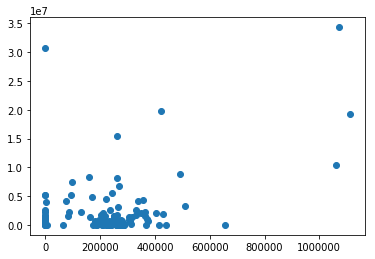

In [5]:
plt.scatter(finance_features[:,0],finance_features[:,1])
plt.show()

In [6]:
clf = cluster.KMeans(n_clusters=2)

In [7]:
clf.fit(finance_features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [8]:
pred=clf.predict(finance_features)

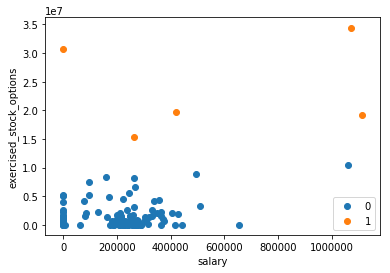

In [9]:
draw_clusters(pred, finance_features, poi, mark_poi=False, name="clusters.pdf", 
     x_lab=feature_1, y_lab=feature_2)

In [10]:
df = pd.DataFrame.from_dict(data_dict, orient='index')
df.reset_index(inplace=True)
df.rename(columns={'index':'full_name'}, inplace=True)

In [11]:
df.exercised_stock_options.astype(float).describe()

count    1.010000e+02
mean     2.959559e+06
std      5.499450e+06
min      3.285000e+03
25%      5.067650e+05
50%      1.297049e+06
75%      2.542813e+06
max      3.434838e+07
Name: exercised_stock_options, dtype: float64

In [12]:
df.salary.astype(float).describe()

count    9.400000e+01
mean     2.840875e+05
std      1.771311e+05
min      4.770000e+02
25%      2.118020e+05
50%      2.587410e+05
75%      3.086065e+05
max      1.111258e+06
Name: salary, dtype: float64

In [13]:
scaler = preprocessing.StandardScaler()

In [14]:
finance_features_std = scaler.fit_transform(finance_features)

In [15]:
clf = cluster.KMeans(n_clusters=2)

In [16]:
pred = clf.fit_predict(finance_features_std)

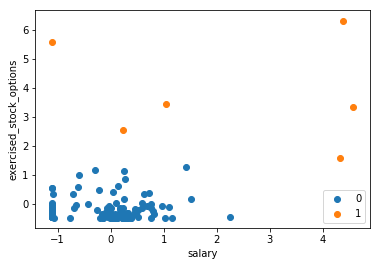

In [17]:
draw_clusters(pred,finance_features_std,poi, x_lab=feature_1, y_lab=feature_2)

In [18]:
mm_scaler = preprocessing.MinMaxScaler()

In [19]:
finance_features_mm = mm_scaler.fit_transform(finance_features)

In [21]:
pred = clf.fit_predict(finance_features_mm)

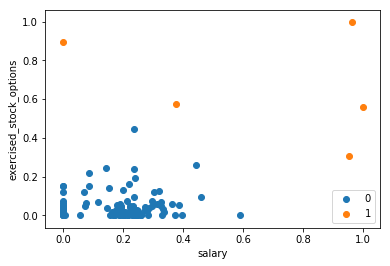

In [22]:
draw_clusters(pred, finance_features_mm, poi, x_lab=feature_1, y_lab=feature_2)

In [36]:
mm_scaler.transform(np.array([[200000,1000000]]))

array([[0.17997621, 0.02911345]])